In [1]:
using BenchmarkTools
using PyPlot
using Distributions

using SuyamaBayes

In [4]:
a = 1.
b = 0.01
N = 2000
true_λ = [100., 50., 15.]
true_p = [0.5, 0.2, 0.3]
true_model, toy_data = generate_toy_data(N)
prior, model = init_model(a = a, b = b)

pmm = PoissionMixtureModel()
pmm.model = model

MixtureModel{Poisson}(K = 3)
components[1] (prior = 0.5182): Poisson{Float64}(λ=224.44887106713844)
components[2] (prior = 0.2366): Poisson{Float64}(λ=14.816880484445843)
components[3] (prior = 0.2452): Poisson{Float64}(λ=193.27323620043165)


In [5]:
gibbs!(pmm, prior, toy_data, maxiter=2000)

PoissionMixtureModel(MixtureModel{Poisson}(K = 3)
components[1] (prior = 0.2222): Poisson{Float64}(λ=50.56244816350302)
components[2] (prior = 0.2921): Poisson{Float64}(λ=15.006716733880063)
components[3] (prior = 0.4857): Poisson{Float64}(λ=100.03642050239101)
, [38.09702635665762 29.29429101171303 100.41521425683815; 51.94106568944714 20.873636153769908 99.0362533616302; … ; 50.217576922809194 15.142827806525565 100.215568795678; 50.56244816350302 15.006716733880063 100.03642050239101], [0.01642357954565069 0.4633774862647101 0.5201989341896393; 0.13524583712240185 0.3590637472616444 0.5056904156159537; … ; 0.2266728521258767 0.2775022900826427 0.4958248577914805; 0.222161222099934 0.2921325361376904 0.4857062417623756], [-12318.890791888705, -9343.652924792212, -8793.27110470993, -8786.76629987072, -8790.88971531001, -8789.133150364252, -8789.028459904082, -8786.299864881392, -8791.37026269759, -8786.76976118522  …  -8787.883449724832, -8791.47757937088, -8787.784270362143, -8788.64

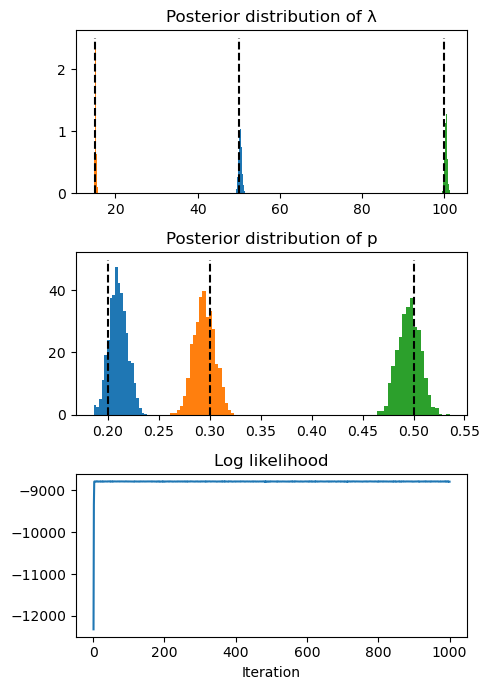

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(5, 7))
K = length(probs(pmm.model))
ax[1].set_title("Posterior distribution of λ")
for k = 1:K
    ax[1].hist(pmm.λs[1000:end, k], density=1, bins=20)
end
ax[1].vlines(true_λ, 0, ax[1].get_ylim()[2], color="k", linestyle="--")

ax[2].set_title("Posterior distribution of p")
for k = 1:K
    ax[2].hist(pmm.ps[1000:end, k], density=1, bins=20)
end
ax[2].vlines(true_p, 0, ax[2].get_ylim()[2], color="k", linestyle="--")

# ax[3].set_title("Log likelihood")
ax[3].set(title="Log likelihood", xlabel="Iteration")
ax[3].plot(1:1000, pmm.loglikelihoods[1:1000])

plt.tight_layout()

In [10]:
a = 1.
b = 0.01
N = 2000
true_λ = [100., 50., 15.]
true_p = [0.5, 0.2, 0.3]
true_model, toy_data = generate_toy_data(N)
prior, model = init_model(a = a, b = b)

vi!(prior, toy_data, maxiter=100)

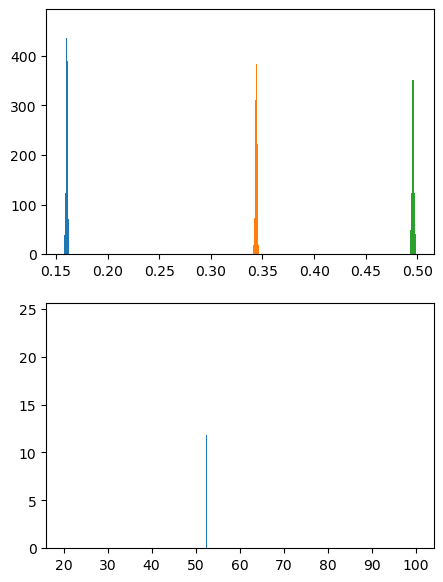

In [11]:
fig, ax = plt.subplots(2, 1, figsize=(5, 7))

alpha = rand(Dirichlet(prior.α), 1000)
lambda = [rand(Gamma(prior.a[k], 1/prior.b[k]), 100) for k = 1:3]
for k = 1:3
    ax[1].hist(alpha[k, :], density=1)
    ax[2].hist(lambda[k], density=1)
end